## Image Captioning

**Image Captioning model** is combination of two models which we have seen in our previous notebooks, a CNN and then a RNN. A CNN model is used to classify images and an advance CNN model like YOLO which is used for localization and recognition of object in an image. A RNN model like LSTM was used to generate the word sequentially one after another.

Using the acquired knowledge, We can combine both CNN and RNN to generate caption text from the Images.
**COCO - Common Objects in Context**, this is the dataset we'll use to generate caption. In the dataset, each image is given a 5 sentences describing the image. When we actually train our model to generate captions, we'll be using these images as input and sampling one caption from a set of captions for each image to train on.

**COCO**: http://cocodataset.org/#explore

### How Image Captioning works - Superficial View

We input an image into a pre-trained convolutional neural network like VGG16 or Resnet model. Normally, a model like this has a fully connected layer followed by softmax function to generate probability distribution of among the class vector. Here, Since we are not classifying the image, we remove the fully connected layer and use the spatial information generated by CNN. These spatial information is nothing but the set of features which is distilled from previous layer before the fully connected layer. Hence, we use CNN as feature extractor to compress the huge amount of information into smaller feature. These smaller feature are used as initial input of the RNN network. So, CNN is also termed as encoder of the network.

To connect the output from CNN to RNN, the feature vectors has to be pre-processed to make it compatible with RNN. There are couple of ways to connect CNN to RNN. The output of CNN is connected additional Fully connected layer or linear layer before given as input RNN.

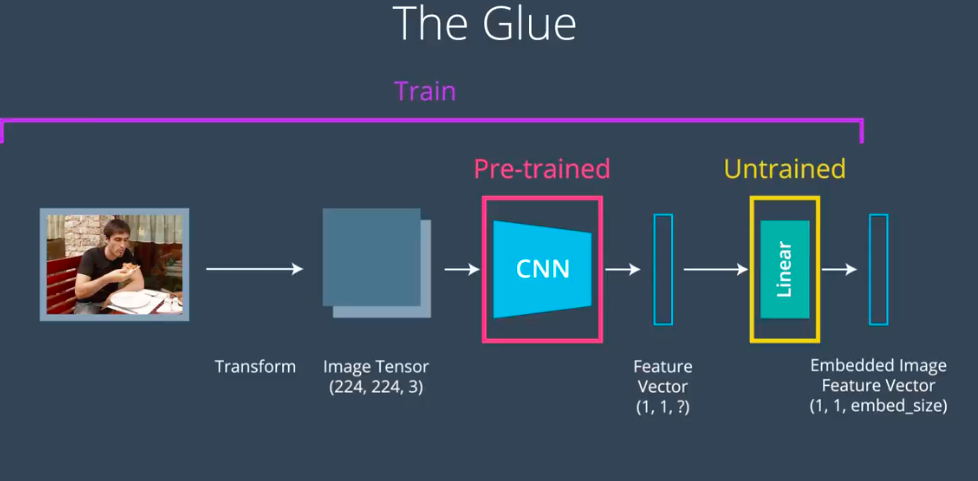

In [1]:
from IPython.display import Image
Image("/Users/mayurjain/Desktop/CNNRNN model.png")

As mentioned earlier, we can connect our feature vector into linear layer, which is untrained, such that we can tweak only the final layer as we train the model to generate the captions. This final layer output is used as initial input to the RNN and which also acts like a decoder of the network, to generate the natural language text.

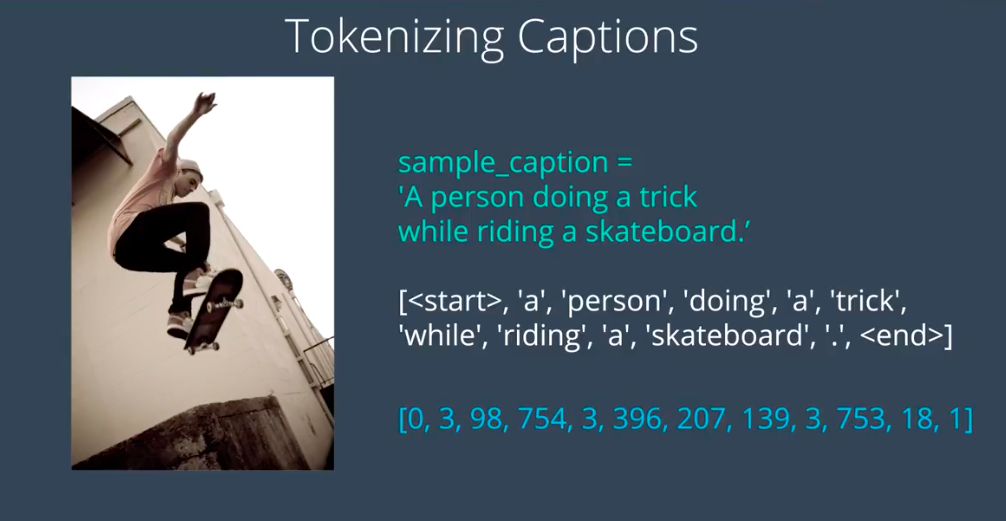

In [2]:
Image("/Users/mayurjain/Desktop/Tokenizing_caption.png")

**The RNN is trained on the Captions of the images, where we predict the next word given a word. Each caption is tokenized into a words and each unique word is mapped to a unique number in a dictionary. Along with all the unique word in the caption, we add 2 more word Start and End to show the start and end of a sentence. A vocaabulary is maintained where all unique words and START & END token is present.**

And before sending the mapped word2int into RNN, the dictionary is passed to an embedding layer. Embedding layer takes in various input sizes converts it into a vector of desired consistent shape.

### Words to Vectors

At this point, we know that you cannot directly feed words into an LSTM and expect it to be able to train or produce the correct output. These words first must be turned into a numerical representation so that a network can use normal loss functions and optimizers to calculate how "close" a predicted word and ground truth word (from a known, training caption) are. So, we typically turn a sequence of words into a sequence of numerical values; a vector of numbers where each number maps to a specific word in our vocabulary.

The feature vector generated by CNN encoder is transformed to a shape as mentioned by embedding layer of the decoder network, such that Decoder (LSTM) network where first LSTM cell takes in input from CNN of embedding layer shape. LSTM has two tasks to perform, one is to remember the spatial information of the image and second is to predict the next word based on current word.

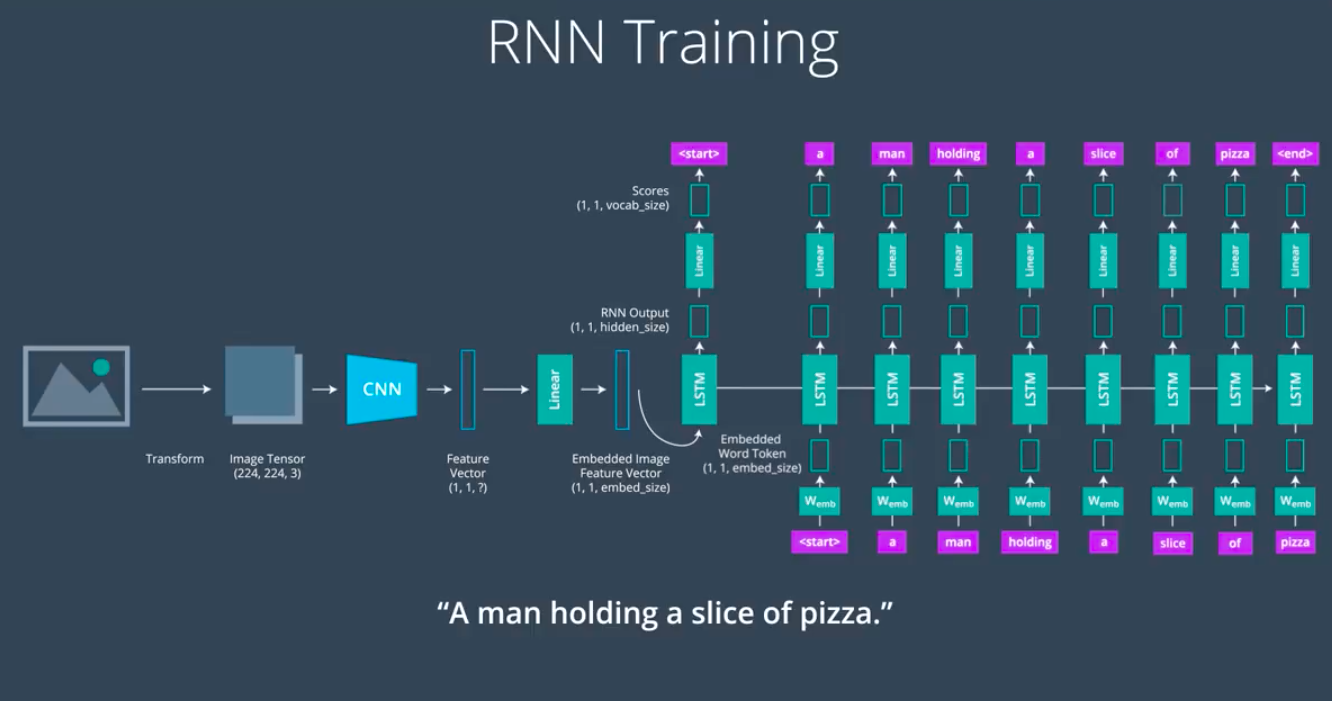

In [3]:
Image("/Users/mayurjain/Desktop/CNNTORNN.png")

### Training vs. Testing
During training, we have a true caption which is fixed, but during testing the caption is being actively generated (starting with "start"), and at each step you are getting the most likely next word and using that as input to the next LSTM cell.

### Caption Generation, Test Data

After the CNN sees a new, test image, the decoder should first produce the "start" token, then an output distribution at each time step that indicates the most likely next word in the sentence. We can sample the output distribution (namely, extract the one word in the distribution with the highest probability of being the next word) to get the next word in the caption and keep this process going until we get to another special token: "end", which indicates that we are done generating a sentence.

### Video Captioning

For Video Captioning, only change we need to make regarding the architecture is how we transform the input feature vector. The Video consists of a set of frames. Each frame has its feature vector, by taking average of the feature vector of all the frames combined together and then treat that one feature vector as Embedded image feature vector.

### References:
**Image Captioning**: https://github.com/udacity/CVND---Image-Captioning-Project